# Run GLS Analysis

In [22]:
import matplotlib.pyplot as plt
import glsanalysisrunner as glsar
import numpy as np
import pandas as pd

sigmas = [np.exp(-1.6), np.exp((-1.6-0.25)/2), np.exp(-0.25)]
amplitudes = [0.5, 0.55/2, 0.05]
params = [[None for _ in range(len(amplitudes))] for _ in range(len(sigmas))] 
df = [[None for _ in range(len(amplitudes))] for _ in range(len(sigmas))]
for i in range(len(sigmas)):
    for j in range(len(amplitudes)):
        params[i][j] = glsar.GlsAnalysisParams()
        params[i][j].smooth_observations = None #5
        params[i][j].norm = 'ZK'
        params[i][j].sigma = sigmas[i]
        params[i][j].amplitude = amplitudes[j]
        params[i][j].package_to_use = 'pyastronomy' #  pyastronomy scipy astroPy
        #params.phase = 2
        results = glsar.GlsAnalysisRunner().run(params=params[i][j], num_iterations=100)
        df[i][j] = pd.DataFrame(results, columns=["is_binary", "period", 'detected_period', 'period_error', 'max_power', 'max_fap_adj', 'num_peaks'])


No output of frequency error.
Increase frequency range to sample the peak maximum.
No output of frequency error.
Increase frequency range to sample the peak maximum.
No output of frequency error.
Increase frequency range to sample the peak maximum.
No output of frequency error.
Increase frequency range to sample the peak maximum.
No output of frequency error.
Increase frequency range to sample the peak maximum.
No output of frequency error.
Increase frequency range to sample the peak maximum.
No output of frequency error.
Increase frequency range to sample the peak maximum.
No output of frequency error.
Increase frequency range to sample the peak maximum.
No output of frequency error.
Increase frequency range to sample the peak maximum.
No output of frequency error.
Increase frequency range to sample the peak maximum.
No output of frequency error.
Increase frequency range to sample the peak maximum.
No output of frequency error.
Increase frequency range to sample the peak maximum.
No o

## Params: sigma=0.20,amplitude=0.50
# max_power 20 pcntile Binaries: 1
# max_power 80 pcntile Non-Binaries: 1
## Params: sigma=0.20,amplitude=0.28
# max_power 20 pcntile Binaries: 1
# max_power 80 pcntile Non-Binaries: 1
## Params: sigma=0.20,amplitude=0.05
# max_power 20 pcntile Binaries: 0
# max_power 80 pcntile Non-Binaries: 1
## Params: sigma=0.40,amplitude=0.50
# max_power 20 pcntile Binaries: 1
# max_power 80 pcntile Non-Binaries: 1
## Params: sigma=0.40,amplitude=0.28
# max_power 20 pcntile Binaries: 1
# max_power 80 pcntile Non-Binaries: 1
## Params: sigma=0.40,amplitude=0.05
# max_power 20 pcntile Binaries: 0
# max_power 80 pcntile Non-Binaries: 1
## Params: sigma=0.78,amplitude=0.50
# max_power 20 pcntile Binaries: 1
# max_power 80 pcntile Non-Binaries: 1
## Params: sigma=0.78,amplitude=0.28
# max_power 20 pcntile Binaries: 0
# max_power 80 pcntile Non-Binaries: 1
## Params: sigma=0.78,amplitude=0.05
# max_power 20 pcntile Binaries: 0
# max_power 80 pcntile Non-Binaries: 1


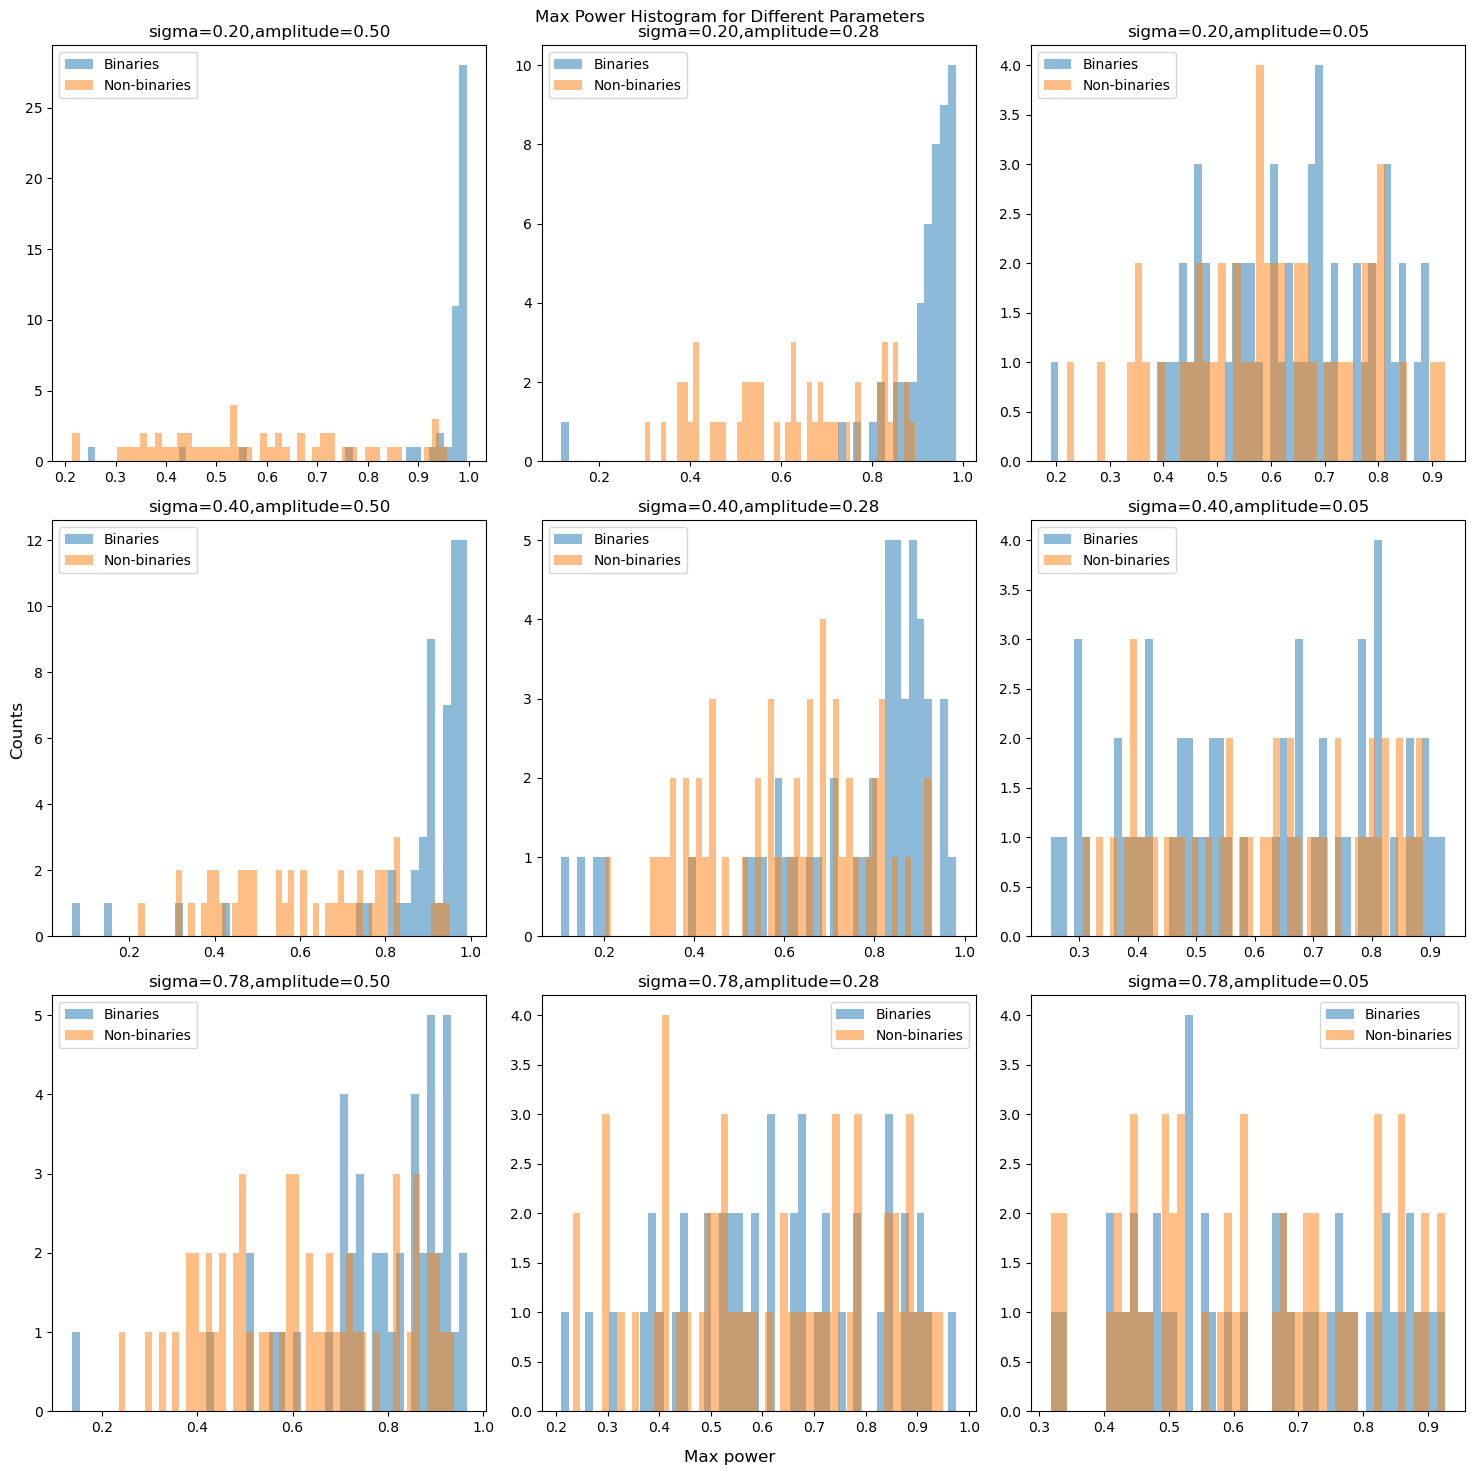

In [23]:
fig, axs = plt.subplots(len(sigmas),len(amplitudes))
fig.suptitle('Max Power Histogram for Different Parameters')
fig.set_figheight(15)
fig.set_figwidth(15)
for i in range(len(sigmas)):
    for j in range(len(amplitudes)):
        print("## Params: " + params[i][j].__str__())
        bin_slice = df[i][j].loc[df[i][j]["is_binary"] == True, "max_power"]
        nonbin_slice = df[i][j].loc[df[i][j]["is_binary"] == False, "max_power"]
        print('# max_power 20 pcntile Binaries: {0:.0f}'.format(bin_slice.quantile(0.2)))
        print('# max_power 80 pcntile Non-Binaries: {0:.0f}'.format(nonbin_slice.quantile(0.8)))
        
        axs[i, j].set_title(params[i][j])
        axs[i, j].hist(bin_slice, bins=50, label='Binaries', alpha = 0.5)
        axs[i, j].hist(nonbin_slice, bins=50, label='Non-binaries', alpha = 0.5)        
        axs[i, j].legend()

#axs[0, 0].legend(loc="upper right")
fig.supxlabel('Max power')
fig.supylabel('Counts')

fig.tight_layout()
fig.savefig('output/GLS - max_power_analysis.png')
plt.show()


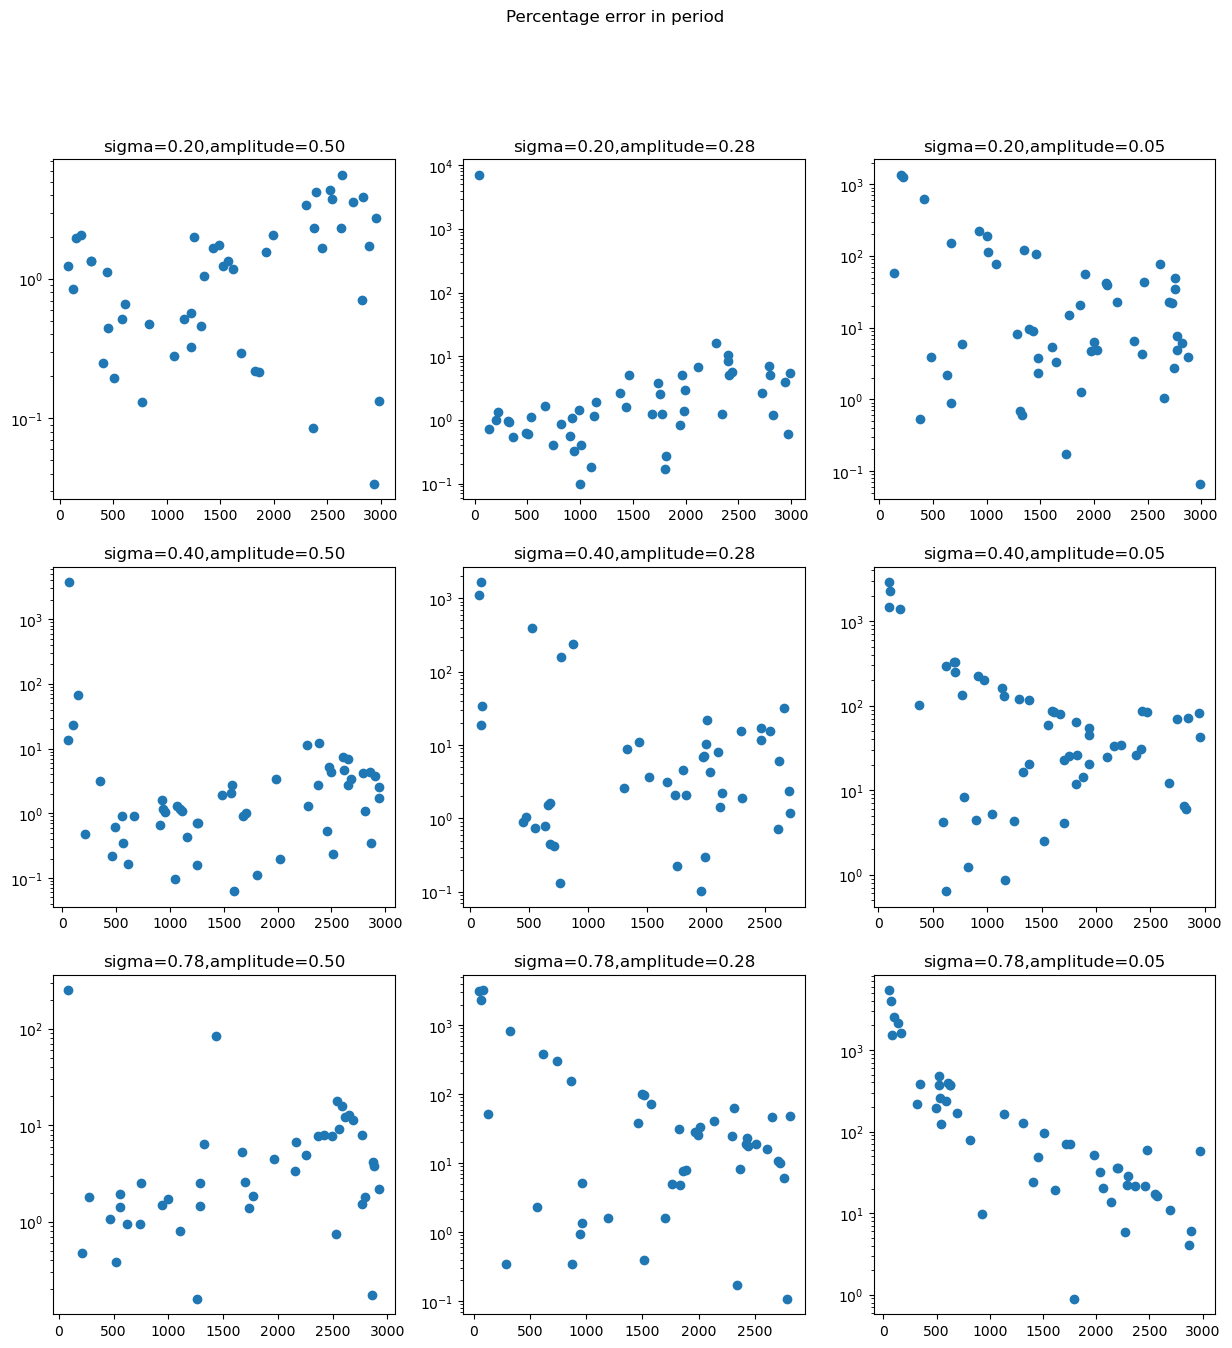

In [24]:
fig, axs = plt.subplots(len(sigmas),len(amplitudes))
fig.suptitle('Percentage error in period')
fig.set_figheight(15)
fig.set_figwidth(15)
for i in range(len(sigmas)):
    for j in range(len(amplitudes)):
        axs[i, j].set_title(params[i][j])
        axs[i][j].scatter(df[i][j].loc[df[i][j]["is_binary"] == True, "period"], 100*df[i][j].loc[df[i][j]["is_binary"] == True, "period_error"])
        axs[i][j].set_yscale('log')
plt.show()

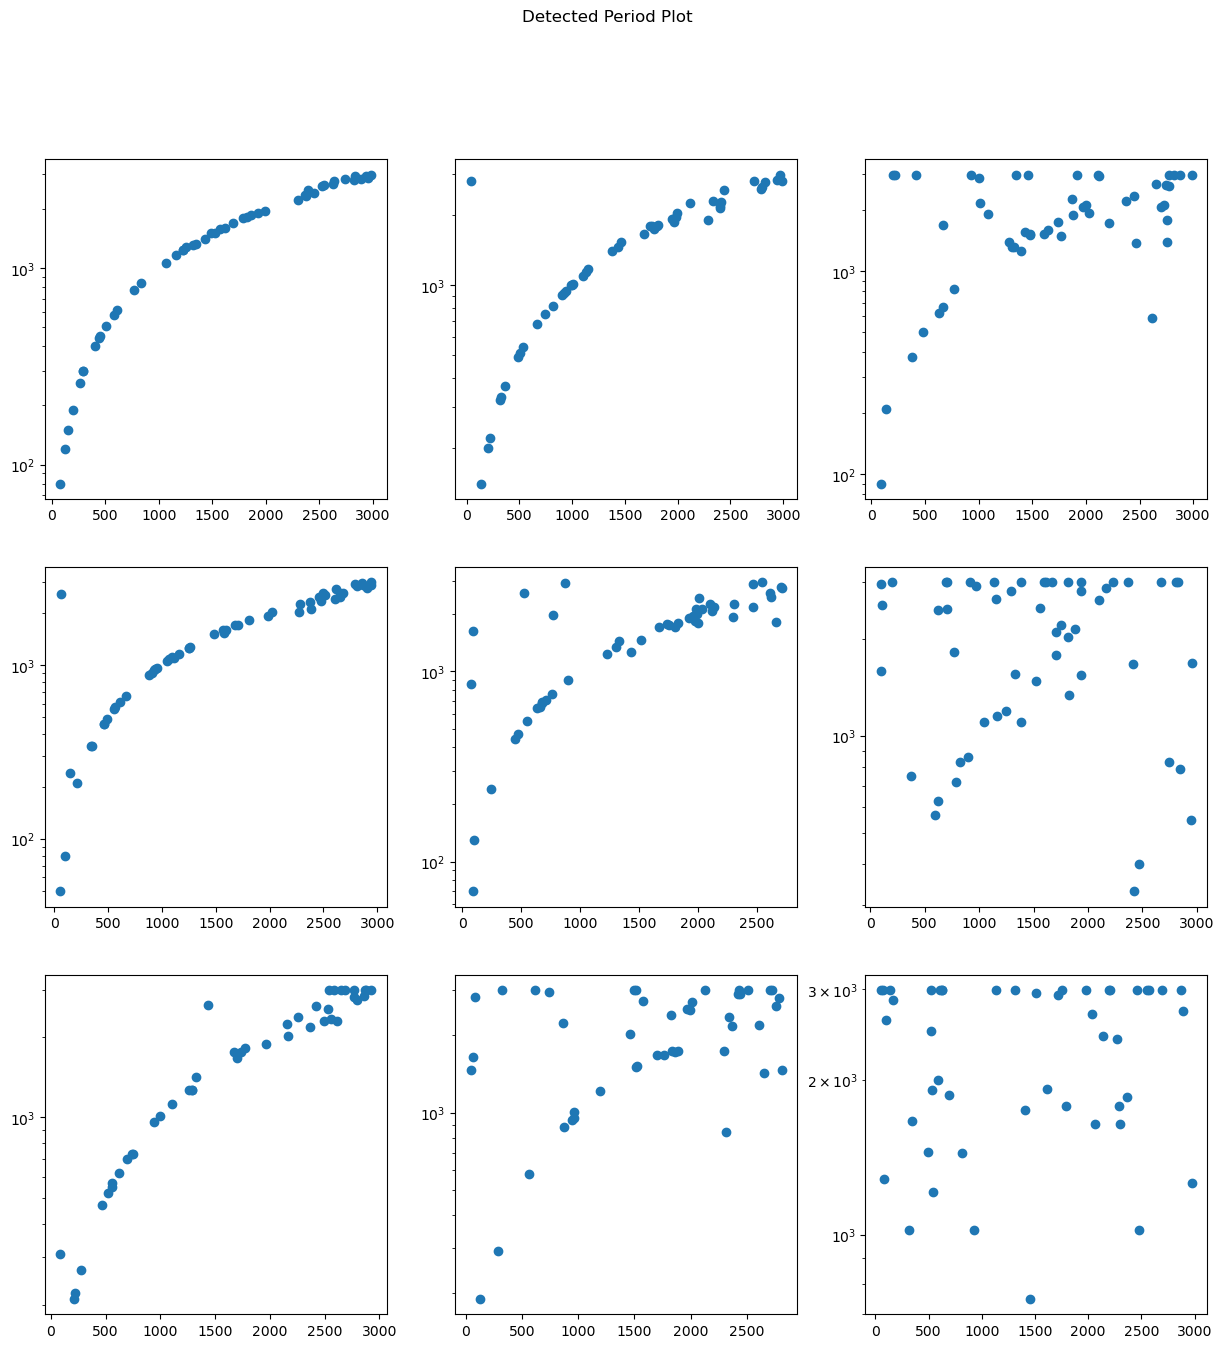

In [25]:
fig, axs = plt.subplots(len(sigmas),len(amplitudes))
fig.suptitle('Detected Period Plot')
fig.set_figheight(15)
fig.set_figwidth(15)
for i in range(len(sigmas)):
    for j in range(len(amplitudes)):
        axs[i][j].scatter(df[i][j].loc[df[i][j]["is_binary"] == True, "period"], df[i][j].loc[df[i][j]["is_binary"] == True, "detected_period"])
        axs[i][j].set_yscale('log')
        #axs[i][j].scatter( df[i][j]["detected_period"])
plt.show()

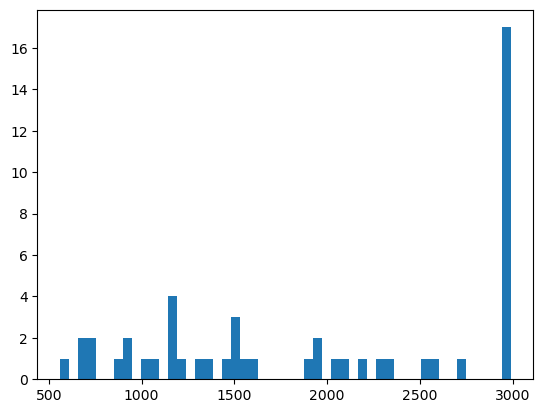

In [26]:
plt.hist(df[0][0].loc[df[0][0]["is_binary"] == False, "detected_period"], bins=50)
plt.show()